Being a non-parametric method, KNN is often successful in classification situations where the decision boundary is very irregular.

## import libraries

In [1]:
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

## load dataset to train K-nearest-neighbors

In [2]:
# load random undersampling data
X_rus_train = pd.read_csv('data/rus/X_rus_train.csv')
X_rus_test = pd.read_csv('data/rus/X_rus_test.csv')

y_rus_train = pd.read_csv('data/rus/y_rus_train.csv')
y_rus_test = pd.read_csv('data/rus/y_rus_test.csv')

# load random oversampling data
X_ros_train = pd.read_csv('data/ros/X_ros_train.csv')
X_ros_test = pd.read_csv('data/ros/X_ros_test.csv')

y_ros_train = pd.read_csv('data/ros/y_ros_train.csv')
y_ros_test = pd.read_csv('data/ros/y_ros_test.csv')

# load preprocessed original data
X_org_train = pd.read_csv('data/org/X_org_train.csv')
X_org_test = pd.read_csv('data/org/X_org_test.csv')

y_org_train = pd.read_csv('data/org/y_org_train.csv')
y_org_test = pd.read_csv('data/org/y_org_test.csv')

## K-nearest-neighbors model

The optimal choice of the value K is highly data-dependent: in general a larger suppresses the effects of noise, but makes the classification boundaries less distinct. That is why we try the algorithm with different K values to find the best K. 

The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point

In [3]:
### knn model hyperparameters ###
NEIGHBORS = [1, 3, 5, 7, 11, 13, 15, 17, 19, 21, 23, 25, 27] # number of neighbors
WEIGHTS = ['uniform', 'distance'] # weights 
ALGORITHM = 'auto'

### knn on random undersampling

In [5]:
# dictionary to save each model hyperparameters along with accuracy
dic_model_knn_rus = dict() 

# keep track of the highest accuracy
best_acc = 0 
# keep track of the model with highest accuracy
best_model = 1 

# the key for dictionary
model_number = 1

for N in NEIGHBORS:
    for W in WEIGHTS:
        # create KNN object
        knn = KNeighborsClassifier(n_neighbors=N, weights=W, algorithm=ALGORITHM)
        
        # train the model
        knn.fit(X_rus_train, y_rus_train)
        # predict the true labels
        y_pred = knn.predict(X_rus_test)

        accuracy = accuracy_score(y_true=y_rus_test, y_pred=y_pred)
        dic_model_knn_rus[model_number] = [accuracy, N, W]

        if accuracy > best_acc:
            best_acc = accuracy
            best_model = model_number
        
        model_number += 1

In [6]:
print(f'knn with random undersampling {best_acc = }')
print(f'knn with random undersampling {best_model = }')
print('knn with random undersampling best model hyperparameters',  
      dic_model_knn_rus[best_model])

knn with random undersampling best_acc = 0.7195981156459749
knn with random undersampling best_model = 25
knn with random undersampling best model hyperparameters [0.7195981156459749, 27, 'uniform']


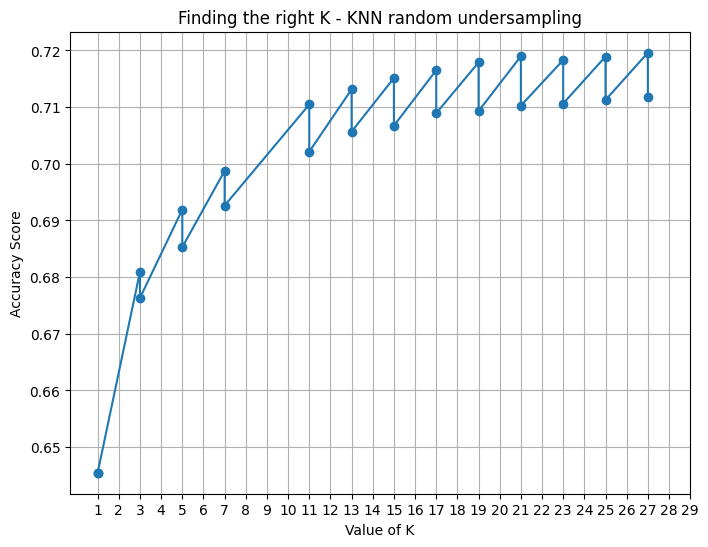

In [7]:
# plot each model's accuracy
ACC = []
K = []

for model in dic_model_knn_rus.keys():
    ACC.append(dic_model_knn_rus[model][0])
    K.append(dic_model_knn_rus[model][1])

plt.figure(figsize=(8, 6))
plt.plot(K, ACC, marker = "o")
plt.xlabel("Value of K")
plt.ylabel("Accuracy Score")
plt.title("Finding the right K - KNN random undersampling")
plt.xticks(range(1, 30))
plt.grid()

### knn on random oversampling

In [8]:
# dictionary to save each model hyperparameters along with accuracy
dic_model_knn_ros = dict() 

# keep track of the highest accuracy
best_acc = 0 
# keep track of the model with highest accuracy
best_model = 1 

# the key for dictionary
model_number = 1

for N in NEIGHBORS:
    for W in WEIGHTS:
        # create KNN object
        knn = KNeighborsClassifier(n_neighbors=N, weights=W, algorithm=ALGORITHM)
        
        # train the model
        knn.fit(X_ros_train, y_ros_train)
        # predict the true labels
        y_pred = knn.predict(X_ros_test)

        accuracy = accuracy_score(y_true=y_ros_test, y_pred=y_pred)
        dic_model_knn_ros[model_number] = [accuracy, N, W]

        if accuracy > best_acc:
            best_acc = accuracy
            best_model = model_number
        
        model_number += 1

In [11]:
print(f'knn with random oversampling {best_acc = }')
print(f'knn with random oversampling {best_model = }')
print('knn with random oversampling best model hyperparameters',  
      dic_model_knn_ros[best_model])

knn with random oversampling best_acc = 0.9014677668418836
knn with random oversampling best_model = 1
knn with random oversampling best model hyperparameters [0.9014677668418836, 1, 'uniform']


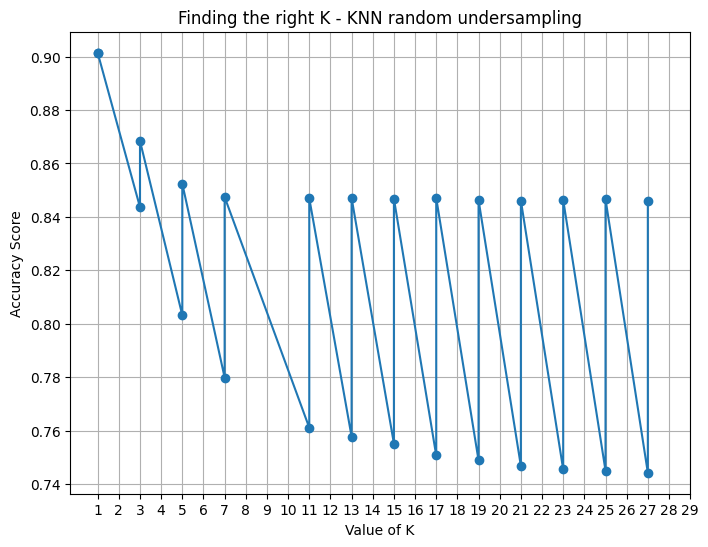

In [12]:
# plot each model's accuracy
ACC = []
K = []

for model in dic_model_knn_ros.keys():
    ACC.append(dic_model_knn_ros[model][0])
    K.append(dic_model_knn_ros[model][1])

plt.figure(figsize=(8, 6))
plt.plot(K, ACC, marker = "o")
plt.xlabel("Value of K")
plt.ylabel("Accuracy Score")
plt.title("Finding the right K - KNN random oversampling")
plt.xticks(range(1, 30))
plt.grid()

## knn on original dataset

KNN suffers from the problem of class imbalance. This is because during the majority voting in the classification phase, instances from the majority class tend to dominate the prediction of the test instance. One way to overcome this drawback is to give different weights to the training instances. Using a weighted KNN approach, where the weights are inversely proportional to the distance from the query point. 

In [14]:
### knn model hyperparameters ###
NEIGHBORS = [1, 3, 5, 7, 11, 13, 15, 17, 19, 21, 23, 25, 27] # number of neighbors
WEIGHTS = 'distance' # weights 
ALGORITHM = 'auto'

In [15]:
# dictionary to save each model hyperparameters along with accuracy
dic_model_knn_org = dict() 

# keep track of the highest accuracy
best_acc = 0 
# keep track of the model with highest accuracy
best_model = 1 

# the key for dictionary
model_number = 1

for N in NEIGHBORS:
    # create KNN object
    knn = KNeighborsClassifier(n_neighbors=N, weights=WEIGHTS, algorithm=ALGORITHM)
    
    # train the model
    knn.fit(X_org_train, y_org_train)
    # predict the true labels
    y_pred = knn.predict(X_org_test)

    accuracy = accuracy_score(y_true=y_org_test, y_pred=y_pred)
    dic_model_knn_org[model_number] = [accuracy, N, WEIGHTS]

    if accuracy > best_acc:
        best_acc = accuracy
        best_model = model_number
    
    model_number += 1

In [16]:
print(f'knn on original data {best_acc = }')
print(f'knn on original data {best_model = }')
print('knn on original data best model hyperparameters',  
      dic_model_knn_org[best_model])

knn on original data best_acc = 0.8391411752338904
knn on original data best_model = 13
knn on original data best model hyperparameters [0.8391411752338904, 27, 'distance']


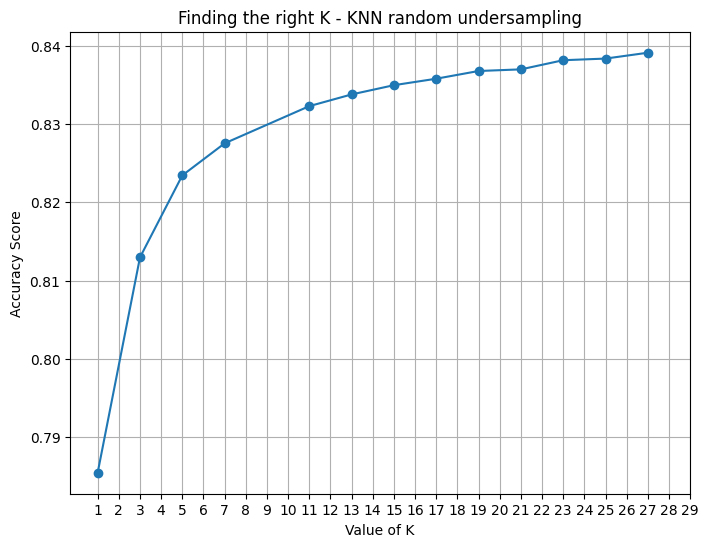

In [18]:
# plot each model's accuracy
ACC = []
K = []

for model in dic_model_knn_org.keys():
    ACC.append(dic_model_knn_org[model][0])
    K.append(dic_model_knn_org[model][1])

plt.figure(figsize=(8, 6))
plt.plot(K, ACC, marker = "o")
plt.xlabel("Value of K")
plt.ylabel("Accuracy Score")
plt.title("Finding the right K - KNN original dataset")
plt.xticks(range(1, 30))
plt.grid()

## save models performance report

In [17]:
df_rus_model = pd.DataFrame(dic_model_knn_rus)
df_ros_model = pd.DataFrame(dic_model_knn_ros)
df_org_model = pd.DataFrame(dic_model_knn_org)

df_rus_model.to_csv('findings/knn/df_rus_model.csv', index=False)
df_ros_model.to_csv('findings/knn/df_ros_model.csv', index=False)
df_ros_model.to_csv('findings/knn/df_org_model.csv', index=False)